# Import

In [1]:
import requests
import pprint
import re
from bs4 import BeautifulSoup
import os
import time
import random
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from random import randint
from time import sleep
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


# Scrape website for lyrics

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

## The Tragically Hip

In [3]:
artist = 'tragicallyhip'

URL = 'https://www.lyrics.com/album/3746671/Live-From-the-Vault%2C-Vol.-4'
response = requests.get(url = URL, headers=headers)
response.status_code

#pprint.pprint(response.text) 

200

In [4]:
file = open(file="hip_html.txt",mode='w')
file.write(response.text)
file.close()

In [5]:
file = open(file="hip_html.txt",mode='r')
hip = file.read()
file.close()

In [6]:
#pattern for Regex for Lyrics.com
pattern='/lyric/[^"]+'

In [7]:
#pull lyric links from html text
songs_hip = re.findall(pattern, hip, re.IGNORECASE)

In [8]:
# Get the complete urls
prefix_url = 'https://www.lyrics.com'

full_url_list=[]

for hyper_link in songs_hip:
    full_url = prefix_url + hyper_link
    full_url_list.append(full_url)

   

In [9]:
final_url = []

for item in full_url_list:                
    final_url.append(item)


Commented out the following block of code so that it isn't scraped again

In [10]:
# for loop to download all lyrics
#results=[]

#for i in range(len(final_url)):
#    temp_url = final_url[i]
#    title = temp_url.split('/')[-1].replace('+', '_').replace('%2', '').lower()
#    time.sleep(6) 
#    response = requests.get(temp_url, headers=headers)
#    src = response.content
#    soup = BeautifulSoup(response.text , 'html.parser')
#    results.append(soup.find_all( "td", class_ = "text-center"))
    
#    with open('Hip/'+ title + '.txt', 'w', encoding='utf-8') as f:
#        f.write(response.text)
#    print(title, response.status_code)
    

#Script will be stopped for a period of 6 seconds.

In [11]:
titles_hip = []
lyrics_hip = []

# for each text file in the data folder,
for filepath in glob("Hip/*.txt"):
    with open(filepath, 'r') as file:
        soup = BeautifulSoup(file, "html.parser")
        lyrics = soup.find(id="lyric-body-text").get_text()
        title = soup.find(id="lyric-title-text").get_text()
        lyrics_hip.append(lyrics)
        titles_hip.append(title)
    

In [12]:
titles_hip

['Fully Completely',
 'Springtime in Vienna',
 'Courage (For Hugh Maclennan)',
 'Little Bones',
 'Put It Off',
 'Gift Shop',
 '700 Foot Ceiling',
 'Titanic Terrarium',
 "Don't Wake Daddy",
 'Ahead by a Century',
 'Yawning or Snarling',
 'Inevitability of Death',
 'New Orleans Is Sinking',
 'The Last of the Unplucked Gems',
 'The Wherewithal',
 'At the Hundredth Meridian',
 'Fire in the Hole',
 'Grace, Too',
 'Flamenco',
 'Nautical Disaster',
 'Opiated',
 'Butts Wigglin',
 'Greasy Jungle',
 'Locked in the Trunk of a Car']

In [13]:
lyrics_hip

['Bring me back in shackles\nHang me long out in the sun\nExonerate me\nForget about me\n\nI recommend measures for ending it\nLover, she simply slammed the door\nShe said, "You\'re going to miss me\nWait and you\'ll see"\nFully and completely\n\nI ponder the endlessness of the stars\nIgnoring said same of my father\nEither it\'ll move me\nOr it\'ll move right through me\nFully, completely\n\nBring me back in shackles\nAnd hang me long out in the sun\nExonerate me\nThen forget about me\nWait and you\'ll see\nJust wait and you\'ll see\nFully, completely\nFully, completely\nFully, completely',
 "Instructions from the manual could not have been much more plain the blues are still required the blues are still required again\nPast territorial piss-posts past whispers in the closets past screamin' from the rooftops we live to survive our paradoxes\n\nMen here of the secret they pass in upholstered silence they only exist in crisis they only exist in silence past territorial\nPiss-posts past 

## Gwen Stefani

In [14]:
artist = 'Gwen'

URL1 = 'https://www.lyrics.com/album/936330/Harajuku-Lovers-Live-%5BClean%5D'

response1 = requests.get(url = URL1, headers=headers)
response1.status_code

#pprint.pprint(response.text) 

200

In [15]:
URL2 = 'https://www.lyrics.com/album/936328/The-Sweet-Escape'

response2 = requests.get(url = URL2, headers=headers)
response2.status_code

200

In [16]:
file1 = open(file="gwen_html.txt",mode='w')
file1.write(response1.text)
file1.close()

In [17]:
file1 = open(file="gwen_html.txt",mode='r')
gwen = file1.read()
file1.close()

In [18]:
file2 = open(file="gwen2_html.txt",mode='w')
file2.write(response2.text)
file2.close()

In [19]:
file2 = open(file="gwen2_html.txt",mode='r')
gwen2 = file2.read()
file2.close()

In [20]:
#pull lyric links from html text
songs_gwen = re.findall(pattern, gwen, re.IGNORECASE)
songs_gwen2 = re.findall(pattern, gwen2, re.IGNORECASE)

In [21]:
# Get the complete urls
prefix_url_gwen = 'https://www.lyrics.com'

full_url_list_gwen=[]

for hyper_link in songs_gwen:
    full_url_gwen = prefix_url_gwen + hyper_link
    full_url_list_gwen.append(full_url_gwen)

In [22]:
# Get the complete urls
for hyper_link in songs_gwen2:
    full_url_gwen = prefix_url_gwen + hyper_link
    full_url_list_gwen.append(full_url_gwen)

Commented out the following block of code so that it isn't scraped again

In [23]:
# for loop to download all lyrics
#results_gwen=[]

#for i in range(len(full_url_list_gwen)):
#    temp_url = full_url_list_gwen[i]
#    title = temp_url.split('/')[-1].replace('+', '_').replace('%2', '').lower()
#    time.sleep(6) 
#    response = requests.get(temp_url, headers=headers)
#    src = response.content
#    soup = BeautifulSoup(response.text , 'html.parser')
#    results_gwen.append(soup.find_all( "td", class_ = "text-center"))
    
#    with open('Gwen/'+ title + '.txt', 'w', encoding='utf-8') as f:
#        f.write(response.text)
#    print(title, response.status_code)
    

#Script will be stopped for a period of 6 seconds.

In [24]:
titles_gwen = []
lyrics_gwen = []

# for each text file in the data folder,
for filepath in glob("Gwen/*.txt"):
    with open(filepath, 'r') as file:
        soup = BeautifulSoup(file, "html.parser")
        lyrics = soup.find(id="lyric-body-text").get_text()
        title = soup.find(id="lyric-title-text").get_text()
        lyrics_gwen.append(lyrics)
        titles_gwen.append(title)
    

In [25]:
titles_gwen

['Luxurious',
 'U Started It',
 'Serious',
 'Yummy',
 'Rich Girl',
 'Wind It Up',
 'Bubble Pop Electric',
 'Harajuku Girls',
 'Hollaback Girl',
 'The Real Thing',
 'Orange County Girl',
 '4 in the Morning',
 'Danger Zone',
 'Now That You Got It',
 "Breakin' Up",
 'Early Winter',
 'Wonderful Life',
 'Long Way to Go',
 'Cool',
 'The Sweet Escape',
 "Don't Get It Twisted",
 'Crash']

In [26]:
print(lyrics_gwen)

["Working so hard, every night and day\nAnd now we get the pay back\nTrying so hard, saving up the paper\nNow we get to lay back\nWorking so hard, every night and day\nAnd now we get the pay back, the pay back, the pay back\n\nChampagne kisses, hold me in your lap of luxury\nI only want to fly first-class desires, you're my limousine\nSo elegant, the way we ride, our passion, it just multiplies\nThere's platinum lightning in the sky\nLook I'm livin' like a queen\n\nThis kind of love is getting expensive\nWe know how to live, baby\nWe're luxurious, like Egyptian cotton\nWe're so rich in love, we're rollin' in cashmere\nGot it in fifth gear, baby\nDiamond in the rough is lookin' so sparkly\n\nWorking so hard, every night and day\nAnd now we get the pay back\nTrying so hard, saving up the paper\nNow we get to lay back\nWorking so hard, every night and day\nAnd now we get the pay back, the pay back, the pay back\n\nSugar, honey, sexy baby\nWhen we touch it turns to gold\nSensitive and deli

# Bag of Words

In [27]:
full_lyrics = lyrics_hip + lyrics_gwen

In [28]:
corpus=full_lyrics


Remove words that are 70% documents (does a good job of removing stop-words), and make all letters lowercase in document

In [29]:
vectorizer = CountVectorizer(lowercase=True, max_df=0.7) #stop_words='english'

In [30]:
matrix = vectorizer.fit_transform(corpus)
matrix

<46x1775 sparse matrix of type '<class 'numpy.int64'>'
	with 4133 stored elements in Compressed Sparse Row format>

In [31]:
type(matrix)

scipy.sparse._csr.csr_matrix

In [32]:
matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [33]:
df = pd.DataFrame(matrix.todense(), columns=vectorizer.get_feature_names_out())

In [34]:
#df

# Normalisation using TF-IDF

This normalizes the word counts in our BoW and addresses the frequency of the word in the whole corpus (not just one document).

TD-IDF measures the originality of the word in general

In [35]:
tf = TfidfTransformer()

In [36]:
transformed = tf.fit_transform(matrix)
transformed

<46x1775 sparse matrix of type '<class 'numpy.float64'>'
	with 4133 stored elements in Compressed Sparse Row format>

In [37]:
tfdf = pd.DataFrame(transformed.todense(), columns=vectorizer.get_feature_names_out())
#tfdf

# Logistic Regression Model

In [38]:
X = tfdf.values
y = [' The Tragically Hip'] * 24 + ['Gwen'] * 22
#y

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [40]:
#y_train

In [41]:
m = LogisticRegression()
m.fit(x_train, y_train)

LogisticRegression()

In [42]:
m.score(x_train, y_train)

1.0

In [43]:
ypred=m.predict_proba(x_train)
ypred

array([[0.44964951, 0.55035049],
       [0.67897281, 0.32102719],
       [0.67776518, 0.32223482],
       [0.4969992 , 0.5030008 ],
       [0.67688606, 0.32311394],
       [0.69354386, 0.30645614],
       [0.68978435, 0.31021565],
       [0.46084586, 0.53915414],
       [0.47548442, 0.52451558],
       [0.65564598, 0.34435402],
       [0.68378467, 0.31621533],
       [0.46377924, 0.53622076],
       [0.67696469, 0.32303531],
       [0.44563057, 0.55436943],
       [0.66868587, 0.33131413],
       [0.4171659 , 0.5828341 ],
       [0.42931188, 0.57068812],
       [0.47692068, 0.52307932],
       [0.45330577, 0.54669423],
       [0.48063951, 0.51936049],
       [0.46843121, 0.53156879],
       [0.48138329, 0.51861671],
       [0.66741645, 0.33258355],
       [0.66728907, 0.33271093],
       [0.69522715, 0.30477285],
       [0.68031645, 0.31968355],
       [0.68811358, 0.31188642],
       [0.66252332, 0.33747668],
       [0.66531661, 0.33468339],
       [0.65796391, 0.34203609],
       [0.

# Make a prediction for a new song

In [44]:
#made up song
song = ["Canadians breathe hockey"]

In [45]:
count = vectorizer.transform(song)
count

<1x1775 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [46]:
count.todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [47]:
tfcounts = tf.transform(count)

In [48]:
y_pred=m.predict(tfcounts)

In [49]:
m.predict_proba(tfcounts)

array([[0.63111763, 0.36888237]])

# Confusion Matrix

/Users/karenbolon/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


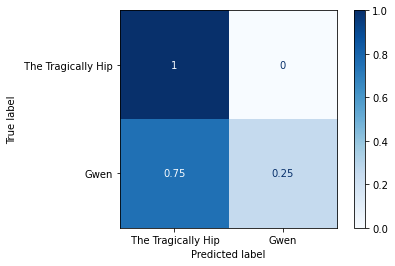

In [50]:
metrics.plot_confusion_matrix(m, x_test, y_test,
                      normalize='true',
                      values_format=".4g",
                      cmap='Blues'
                             );

# Draw a Word Cloud

In [51]:
canada_mask = np.array(Image.open("canada_mask.png"))
#mask = np.array(Image.open('my_image.jpg'))

In [52]:
c_mask=canada_mask
np.place(c_mask, c_mask<1, [255])
#print("Replace 0 with 255:",c_mask)

In [53]:
# iterate through the file for the Tragically Hip
stopwords = set(STOPWORDS)
comment_words = ''


for val in lyrics_hip:
     
    # typecast each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

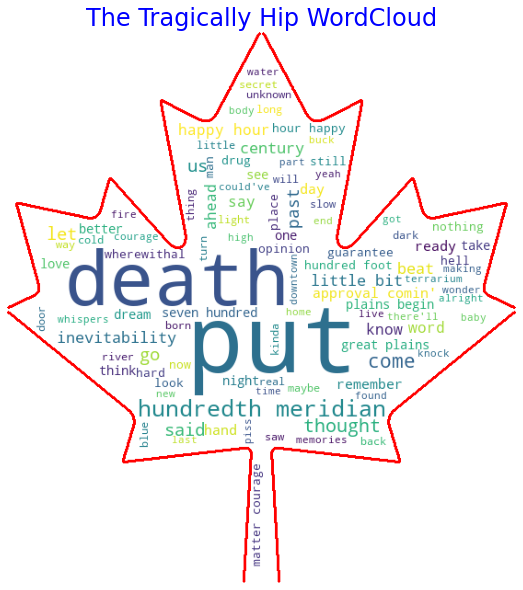

In [54]:


wordcloud = WordCloud(width = 800, height = 800,
                mask=c_mask, background_color ='white',
                stopwords=stopwords, contour_width=3, contour_color='red',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = 'none')
plt.contour_color='steelblue'
plt.imshow(wordcloud)
plt.axis("off")
plt.title("The Tragically Hip WordCloud", fontsize=24, color = 'b')
plt.tight_layout(pad = 0)
#plt.imshow(cloud, interpolation='bilinear')
plt.savefig('maplehip.png') 
plt.show()

In [55]:
star_mask = np.array(Image.open("star.png"))
#mask = np.array(Image.open('my_image.jpg'))

In [56]:
s_mask=star_mask
np.place(s_mask, s_mask<1, [255])
#print("Replace 0 with 255:",c_mask)

In [57]:
# iterate through the file for Gwen
stopwords = set(STOPWORDS)
comment_words2 = ''

for val in lyrics_gwen:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words2 += " ".join(tokens)+" "

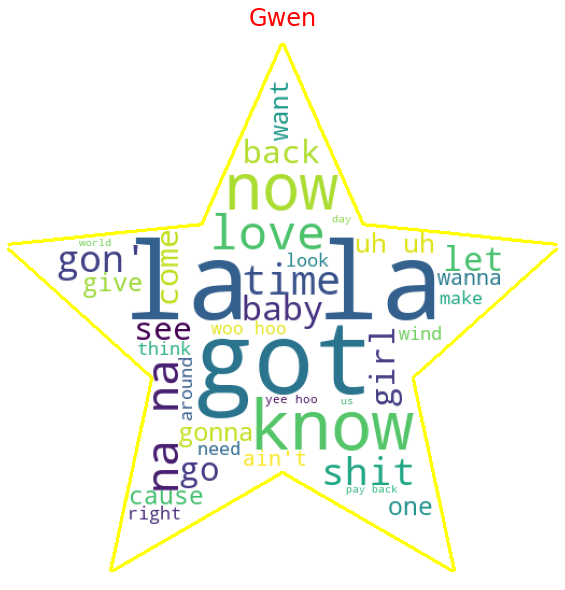

In [58]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask=s_mask,stopwords=stopwords, contour_width=3, contour_color='yellow',
                min_font_size = 10).generate(comment_words2)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Gwen", fontsize=24, color = 'r')
plt.tight_layout(pad = 0)
#plt.imshow(cloud, interpolation='bilinear')
plt.savefig('stargwen.png') 
plt.show()

# Naive Bayes

In [59]:
len(corpus)

46

In [60]:
labels = list('HHHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGG') #H for Tragically Hip and G for Gwen

For MultinomialNB the probability is modelled by dividing the number of times the Artist uses the word 𝑤1 by the total number of words the Artist uses.

**when alpha is very smalll, it gives importance to every word (even rare words), this causes overfitting.**

In [61]:
m = MultinomialNB(alpha=0.1)
m.fit(tfdf, labels)
m.score(tfdf, labels)


1.0

In [62]:
m.predict_proba(tfdf)

array([[0.06410755, 0.93589245],
       [0.00751427, 0.99248573],
       [0.03021533, 0.96978467],
       [0.03305585, 0.96694415],
       [0.13734743, 0.86265257],
       [0.01641258, 0.98358742],
       [0.02396682, 0.97603318],
       [0.01078487, 0.98921513],
       [0.00924313, 0.99075687],
       [0.03750007, 0.96249993],
       [0.00536133, 0.99463867],
       [0.03767769, 0.96232231],
       [0.02824464, 0.97175536],
       [0.03036599, 0.96963401],
       [0.03818028, 0.96181972],
       [0.02104788, 0.97895212],
       [0.04460782, 0.95539218],
       [0.01610176, 0.98389824],
       [0.01434684, 0.98565316],
       [0.00612914, 0.99387086],
       [0.01176108, 0.98823892],
       [0.01691832, 0.98308168],
       [0.00703936, 0.99296064],
       [0.04284854, 0.95715146],
       [0.99332359, 0.00667641],
       [0.99000785, 0.00999215],
       [0.99792562, 0.00207438],
       [0.99782064, 0.00217936],
       [0.97843768, 0.02156232],
       [0.98807584, 0.01192416],
       [0.

alpha = 1

array([[0.64745063, 0.35254937],
       [0.71077103, 0.28922897],
       [0.7028168 , 0.2971832 ],
       [0.6454777 , 0.3545223 ],
       [0.6892959 , 0.3107041 ],
       [0.68386924, 0.31613076],
       [0.71823872, 0.28176128],
       [0.6528814 , 0.3471186 ],
       [0.71229607, 0.28770393],
       [0.68551358, 0.31448642],
       [0.2346679 , 0.7653321 ],
       [0.35592743, 0.64407257],
       [0.27386844, 0.72613156],
       [0.25399594, 0.74600406],
       [0.27865765, 0.72134235],
       [0.27265781, 0.72734219],
       [0.21716177, 0.78283823],
       [0.27030678, 0.72969322],
       [0.24837021, 0.75162979],
       [0.27474114, 0.72525886]])

alpha = 0.5

array([[0.75515598, 0.24484402],
       [0.82686627, 0.17313373],
       [0.81708198, 0.18291802],
       [0.75044811, 0.24955189],
       [0.80496253, 0.19503747],
       [0.80095486, 0.19904514],
       [0.84123327, 0.15876673],
       [0.76175855, 0.23824145],
       [0.83902763, 0.16097237],
       [0.80760185, 0.19239815],
       [0.1151745 , 0.8848255 ],
       [0.25290883, 0.74709117],
       [0.16067366, 0.83932634],
       [0.1398213 , 0.8601787 ],
       [0.16209316, 0.83790684],
       [0.15196837, 0.84803163],
       [0.09559092, 0.90440908],
       [0.15058417, 0.84941583],
       [0.12917575, 0.87082425],
       [0.16066869, 0.83933131]])

alpha = 0.1

array([[0.98003823, 0.01996177],
       [0.98645311, 0.01354689],
       [0.9850868 , 0.0149132 ],
       [0.96983765, 0.03016235],
       [0.98509779, 0.01490221],
       [0.98687131, 0.01312869],
       [0.99356851, 0.00643149],
       [0.97754282, 0.02245718],
       [0.99506443, 0.00493557],
       [0.99086523, 0.00913477],
       [0.00407317, 0.99592683],
       [0.02953048, 0.97046952],
       [0.0136053 , 0.9863947 ],
       [0.00919415, 0.99080585],
       [0.01068076, 0.98931924],
       [0.00748602, 0.99251398],
       [0.00166245, 0.99833755],
       [0.00709397, 0.99290603],
       [0.00581359, 0.99418641],
       [0.01290164, 0.98709836]])

# Test Songs

In [63]:
test_songs = ['winner winner chicken dinner',
             'she flies high',
             'its raining tacos',
             'oh stinky i love you',
             'living in small towns is uneventful']

In [64]:
test_vec = vectorizer.transform(test_songs)
test_vec2 = tf.transform(test_vec)
m.predict(test_vec2)

/Users/karenbolon/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['H', 'H', 'G', 'G', 'H'], dtype='<U1')

In [65]:
test_vec.todense()
vectorizer.get_feature_names_out()

array(['2x', '3x', '401', ..., 'yourself', 'yummy', 'zone'], dtype=object)

In [66]:
m.predict_proba(test_vec)

array([[0.19083125, 0.80916875],
       [0.11991455, 0.88008545],
       [0.54087947, 0.45912053],
       [0.96648775, 0.03351225],
       [0.28482807, 0.71517193]])